## Imports

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.preprocessing import image

import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Directory, Image-Name & Image-Size Definitions

In [11]:
model_dir = '/home/drevital/cs_video_processor/models/suzuyo'
obs_dir = '/home/drevital/obstacles_classification_datasets/suzuyo/eval/obstacle'
no_obs_dir = '/home/drevital/obstacles_classification_datasets/suzuyo/eval/no_obstacle'
obs_imname = '57_4377_2021-07-01--12-40-08.jpg'
no_obs_imname = '22_2376_2021-07-04--09-58-38_rotate_3.jpg'
img_height = 200
img_width = 200

## Load Trained Model

In [12]:
model = tf.keras.models.load_model(model_dir)

## Read Images

In [13]:
obs_imrgb = cv2.imread(os.path.join(obs_dir, obs_imname))
obs_image = cv2.cvtColor(obs_imrgb, cv2.COLOR_BGR2GRAY)        
no_obs_imrgb = cv2.imread(os.path.join(no_obs_dir, no_obs_imname))
no_obs_image = cv2.cvtColor(no_obs_imrgb, cv2.COLOR_BGR2GRAY)  

## Display Images

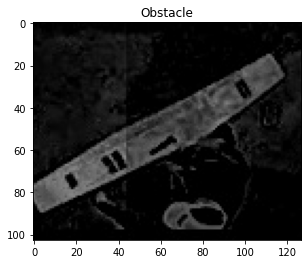

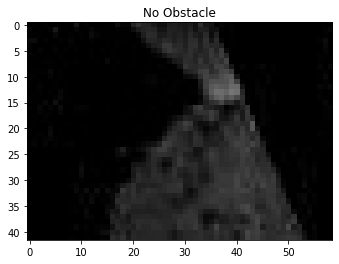

In [14]:
plt.imshow(obs_image, cmap='gray', vmin=0, vmax=255)
plt.title('Obstacle')
plt.show() 

plt.imshow(no_obs_image, cmap='gray', vmin=0, vmax=255)
plt.title('No Obstacle')
plt.show() 

## Prepare Images for Prediction

In [15]:
obs_image = tf.keras.preprocessing.image.load_img(os.path.join(obs_dir, obs_imname),
                                                  color_mode='grayscale',
                                                  target_size=(img_height, img_width),
                                                  interpolation='bilinear')
obs_input_arr = keras.preprocessing.image.img_to_array(obs_image)
obs_input_arr = np.array([obs_input_arr])  # Convert single image to a batch.
obs_input_arr /= 255.0

no_obs_image = tf.keras.preprocessing.image.load_img(os.path.join(no_obs_dir, no_obs_imname),
                                                     color_mode='grayscale',
                                                     target_size=(img_height, img_width),
                                                     interpolation='bilinear')
no_obs_input_arr = keras.preprocessing.image.img_to_array(no_obs_image)
no_obs_input_arr = np.array([no_obs_input_arr])  # Convert single image to a batch.
no_obs_input_arr /= 255.0

## Predict 

In [16]:
obs_prediction = model.predict(obs_input_arr)
no_obs_prediction = model.predict(no_obs_input_arr)

## Show Obstacle Prediction

In [17]:
obs_prediction

array([[0.9956442]], dtype=float32)

## Show No_Obstacle Prediction

In [18]:
no_obs_prediction

array([[0.03968364]], dtype=float32)